In [55]:

import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 0)

In [11]:
train_df = pd.read_csv('train.tsv', sep="\t")



In [6]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1.0
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2.0
2,3,1,A series,2.0
3,4,1,A,2.0
4,5,1,series,2.0


In [7]:
train_df.shape

(61772, 4)

In [8]:
train_df.count()

PhraseId      61772
SentenceId    61772
Phrase        61771
Sentiment     61771
dtype: int64

In [9]:
len(train_df.SentenceId.unique()),len(train_df.Phrase.unique()), len(train_df.PhraseId.unique())

(3120, 61772, 61772)

In [10]:
train_df.Sentiment.unique()

array([ 1.,  2.,  3.,  4.,  0., nan])

In [20]:
train_df.isnull().sum()

PhraseId           0
SentenceId         0
Phrase             0
Sentiment          0
sentiment_label    0
dtype: int64

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [13]:
##Let's check the sentiment distribution in the train set
def id_to_label(id):
    id_to_label_dict = {
        0: 'negative',
        1: 'somewhat negative',
        2: 'neutral',
        3: 'somewhat positive',
        4: 'positive'
    }
    return id_to_label_dict[id]


In [14]:
train_df['sentiment_label'] = list(map(id_to_label, train_df['Sentiment']))

In [15]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,somewhat negative
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,neutral
2,3,1,A series,2,neutral
3,4,1,A,2,neutral
4,5,1,series,2,neutral


In [16]:
sentiment_distribution_counts = train_df.groupby('sentiment_label')['sentiment_label'].count()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


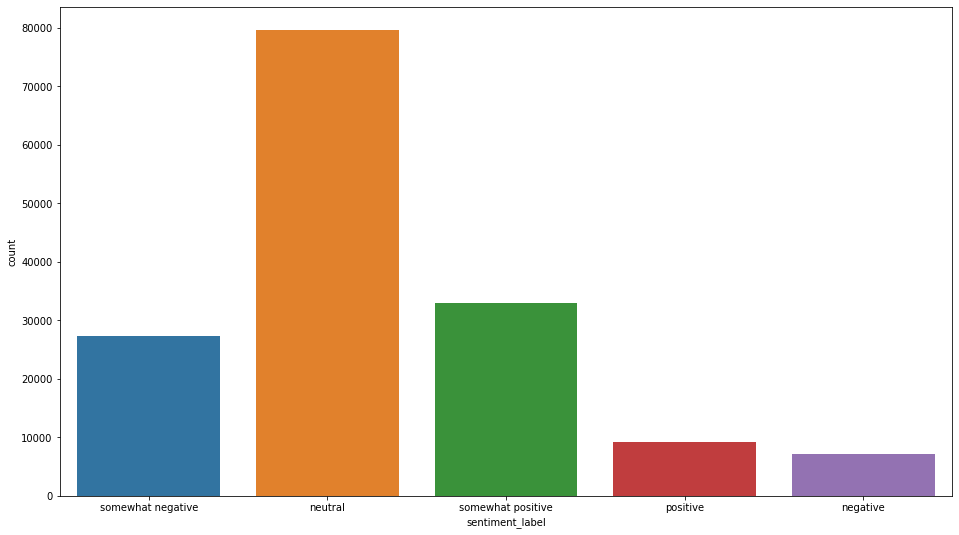

In [17]:
plt.figure(figsize=(16,9))
sns.countplot(train_df['sentiment_label'])

In [18]:
temp_df = train_df.drop_duplicates(subset=['SentenceId'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


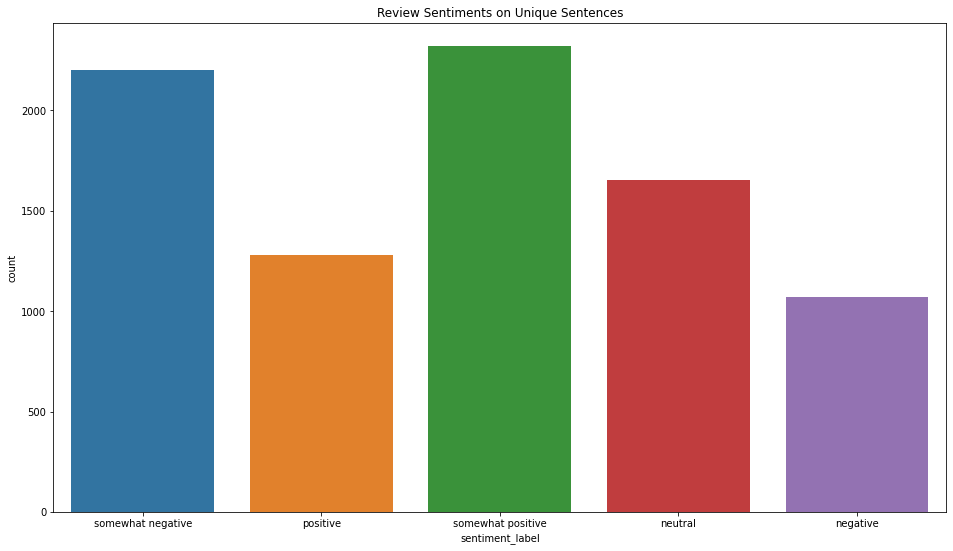

In [19]:
plt.figure(figsize=(16,9))
plt.title('Review Sentiments on Unique Sentences')
sns.countplot(temp_df['sentiment_label'])

In [24]:
##Let's remove punctuation marks as well
import nltk
def remove_punctuation(phrase):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(phrase)
    return ' '.join(new_words)

In [25]:
train_df['clean_phrase'] = list(map(remove_punctuation, train_df['Phrase']))

In [26]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,clean_phrase
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,somewhat negative,A series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,neutral,A series of escapades demonstrating the adage that what is good for the goose
2,3,1,A series,2,neutral,A series
3,4,1,A,2,neutral,A
4,5,1,series,2,neutral,series


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

In [29]:
print(len(english_stops))

179


In [30]:
def remove_stop_words(phrase):
    tokenized = phrase.split(' ')
    filtered = list()
    for word in tokenized:
        if word.lower() not in english_stops:
            filtered.append(word)
    return ' '.join(filtered)

In [31]:
train_df['phrase_without_stopwords'] = list(map(remove_stop_words, train_df['clean_phrase']))


In [32]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,clean_phrase,phrase_without_stopwords
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,somewhat negative,A series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,neutral,A series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose
2,3,1,A series,2,neutral,A series,series
3,4,1,A,2,neutral,A,
4,5,1,series,2,neutral,series,series


In [34]:
##adding phrase length
train_df['phrase_length'] = train_df['phrase_without_stopwords'].apply(lambda x: len(x.split(' ')))


In [35]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,clean_phrase,phrase_without_stopwords,phrase_length
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,somewhat negative,A series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story,series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story,15
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,neutral,A series of escapades demonstrating the adage that what is good for the goose,series escapades demonstrating adage good goose,6
2,3,1,A series,2,neutral,A series,series,1
3,4,1,A,2,neutral,A,,1
4,5,1,series,2,neutral,series,series,1


In [37]:
one_word_review = train_df[train_df.phrase_length == 4]
one_word_review.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,clean_phrase,phrase_without_stopwords,phrase_length
9,10,1,demonstrating the adage that what is good for the goose,2,neutral,demonstrating the adage that what is good for the goose,demonstrating adage good goose,4
47,48,1,but none of which amounts to much of a story,1,somewhat negative,but none of which amounts to much of a story,none amounts much story,4
49,50,1,none of which amounts to much of a story,1,somewhat negative,none of which amounts to much of a story,none amounts much story,4
64,65,2,"This quiet , introspective and entertaining independent",3,somewhat positive,This quiet introspective and entertaining independent,quiet introspective entertaining independent,4
66,67,2,"quiet , introspective and entertaining independent",4,positive,quiet introspective and entertaining independent,quiet introspective entertaining independent,4


In [38]:

nan_value = float("NaN")
train_df.replace("", nan_value, inplace=True)
train_df.replace(" ", nan_value, inplace=True)
train_df.dropna(subset = ["phrase_without_stopwords"], inplace=True)

In [39]:
one_word_review = train_df[train_df.phrase_length == 1]

In [41]:
one_word_review.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,clean_phrase,phrase_without_stopwords,phrase_length
2,3,1,A series,2,neutral,A series,series,1
4,5,1,series,2,neutral,series,series,1
8,9,1,escapades,2,neutral,escapades,escapades,1
11,12,1,demonstrating,2,neutral,demonstrating,demonstrating,1
12,13,1,the adage,2,neutral,the adage,adage,1


In [42]:
##At this point we can visualize some most common words using the wordcloud
from wordcloud import WordCloud

In [45]:
def show_wordcloud(data, stopwords, title = None):
   
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

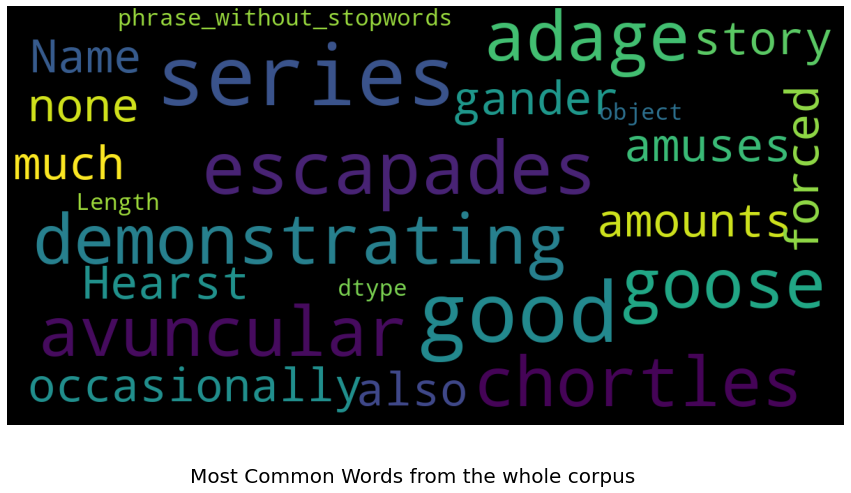

In [46]:
show_wordcloud(train_df['phrase_without_stopwords'], english_stops, 'Most Common Words from the whole corpus')

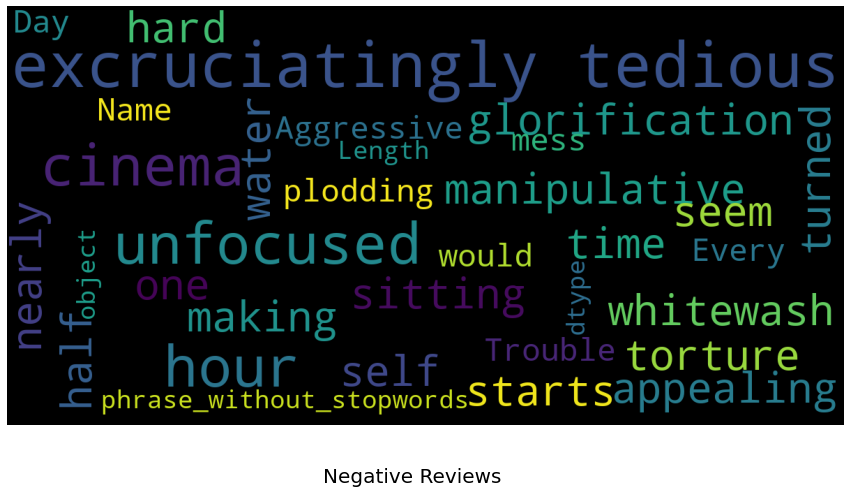

In [47]:
show_wordcloud(train_df[train_df['Sentiment'] == 0]['phrase_without_stopwords'], english_stops, 'Negative Reviews')

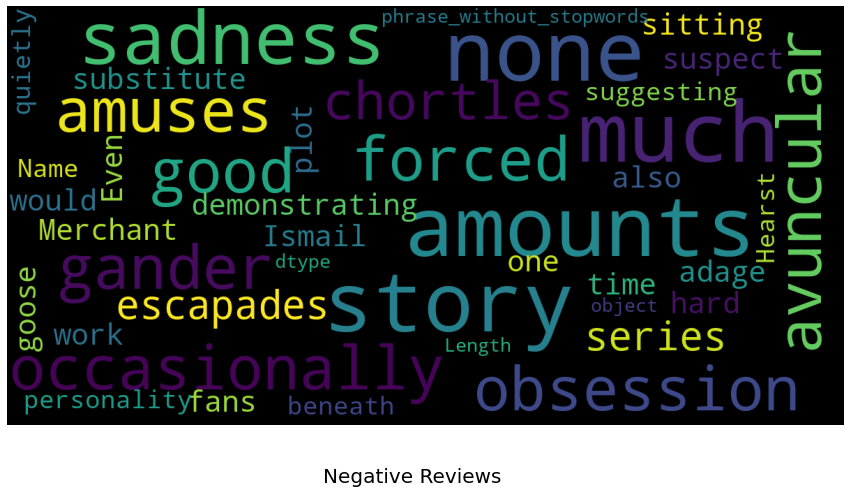

In [48]:
show_wordcloud(train_df[train_df['Sentiment'] == 1]['phrase_without_stopwords'], english_stops, 'Negative Reviews')

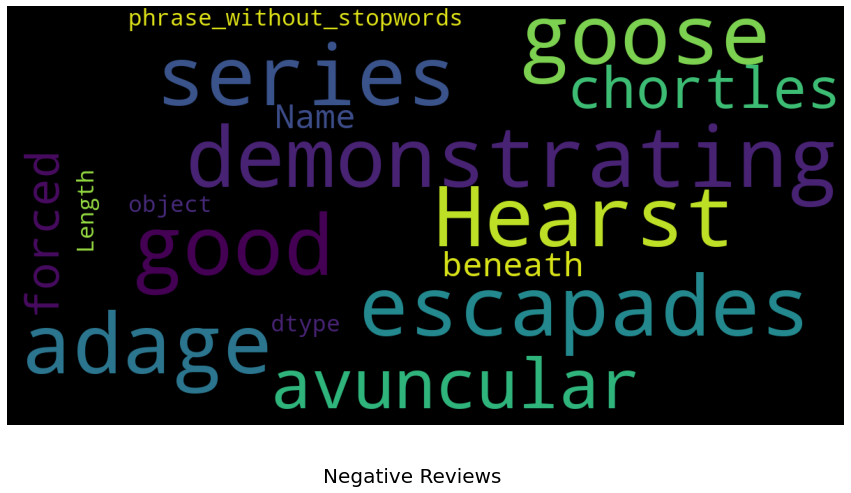

In [49]:
show_wordcloud(train_df[train_df['Sentiment'] == 2]['phrase_without_stopwords'], english_stops, 'Negative Reviews')

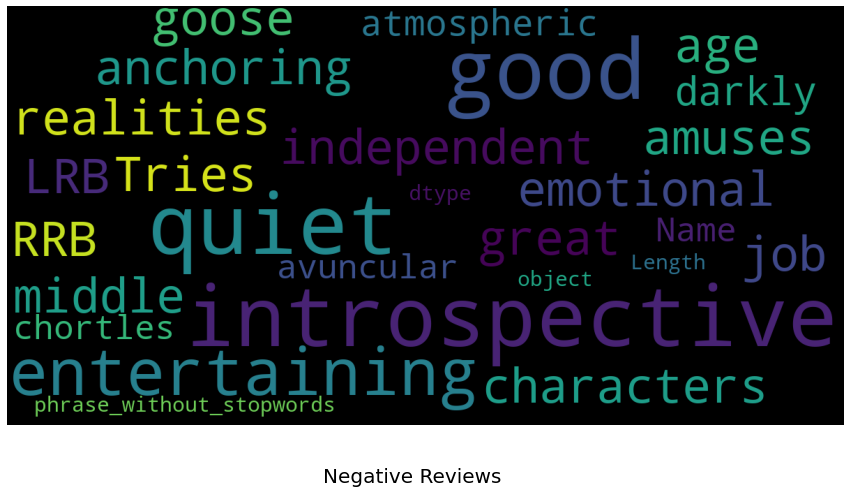

In [50]:
show_wordcloud(train_df[train_df['Sentiment'] == 3]['phrase_without_stopwords'], english_stops, 'Negative Reviews')

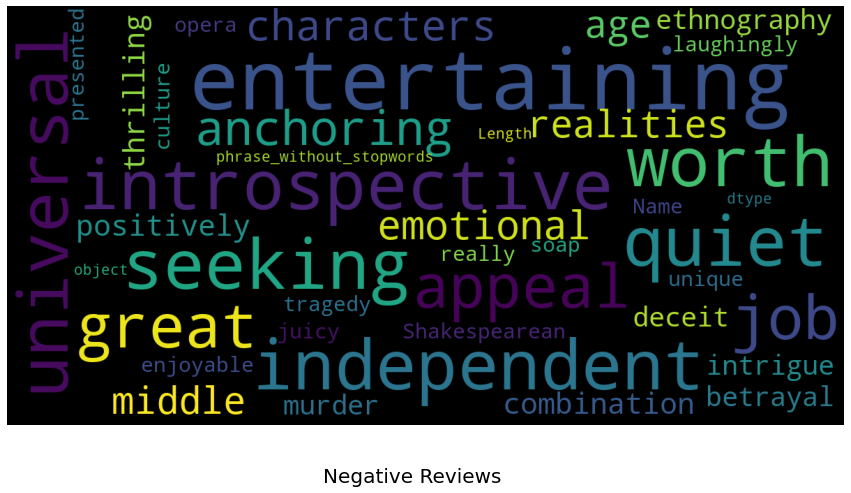

In [51]:
show_wordcloud(train_df[train_df['Sentiment'] == 4]['phrase_without_stopwords'], english_stops, 'Negative Reviews')

In [52]:
grouped_by_sentiment = one_word_review.groupby('sentiment_label')

In [53]:
from collections import defaultdict
sentiment_word_count_dict = dict()

for sentiment, data in grouped_by_sentiment:
    sentiment_word_count_dict[sentiment] = dict()
    for d in data.values:
        if d[-2] not in sentiment_word_count_dict[sentiment].keys():
            sentiment_word_count_dict[sentiment][d[-2]] = 1
        else:
            sentiment_word_count_dict[sentiment][d[-2]] +=1

In [54]:
train_df['sentiment_label'].unique()

array(['somewhat negative', 'neutral', 'somewhat positive', 'positive',
       'negative'], dtype=object)

In [56]:
negative_sentiment_dict = sentiment_word_count_dict['negative']
somewhat_negative_sentiment_dict = sentiment_word_count_dict['somewhat negative']
neutral_sentiment_dict = sentiment_word_count_dict['neutral']
somewhat_positive_sentiment_dict = sentiment_word_count_dict['somewhat positive']
positive_sentiment_dict = sentiment_word_count_dict['positive']

In [57]:
import operator
sorted_negative_sentiment_words = sorted(negative_sentiment_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_somewhat_negative_sentiment_words = sorted(somewhat_negative_sentiment_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_neutral_sentiment_words = sorted(neutral_sentiment_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_somewhat_positive_sentiment_words = sorted(somewhat_positive_sentiment_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_positive_sentiment_words = sorted(positive_sentiment_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]

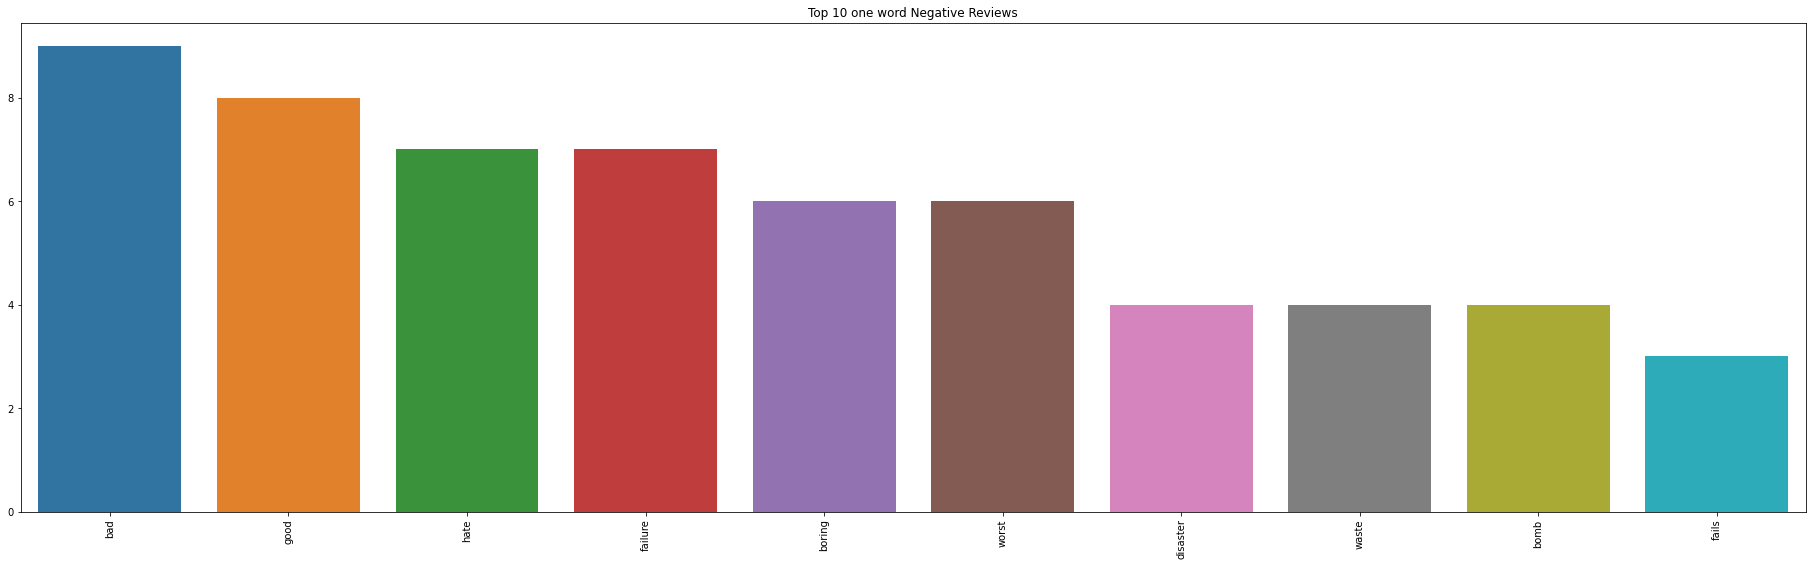

In [58]:
##Plotting Top 10 negative sentiment words
plt.figure(figsize=(32,9))
plt.xticks(rotation=90)
plt.title("Top 10 one word Negative Reviews")
sns.barplot(x=[i[0] for i in sorted_negative_sentiment_words], y=[i[1] for i in sorted_negative_sentiment_words], )

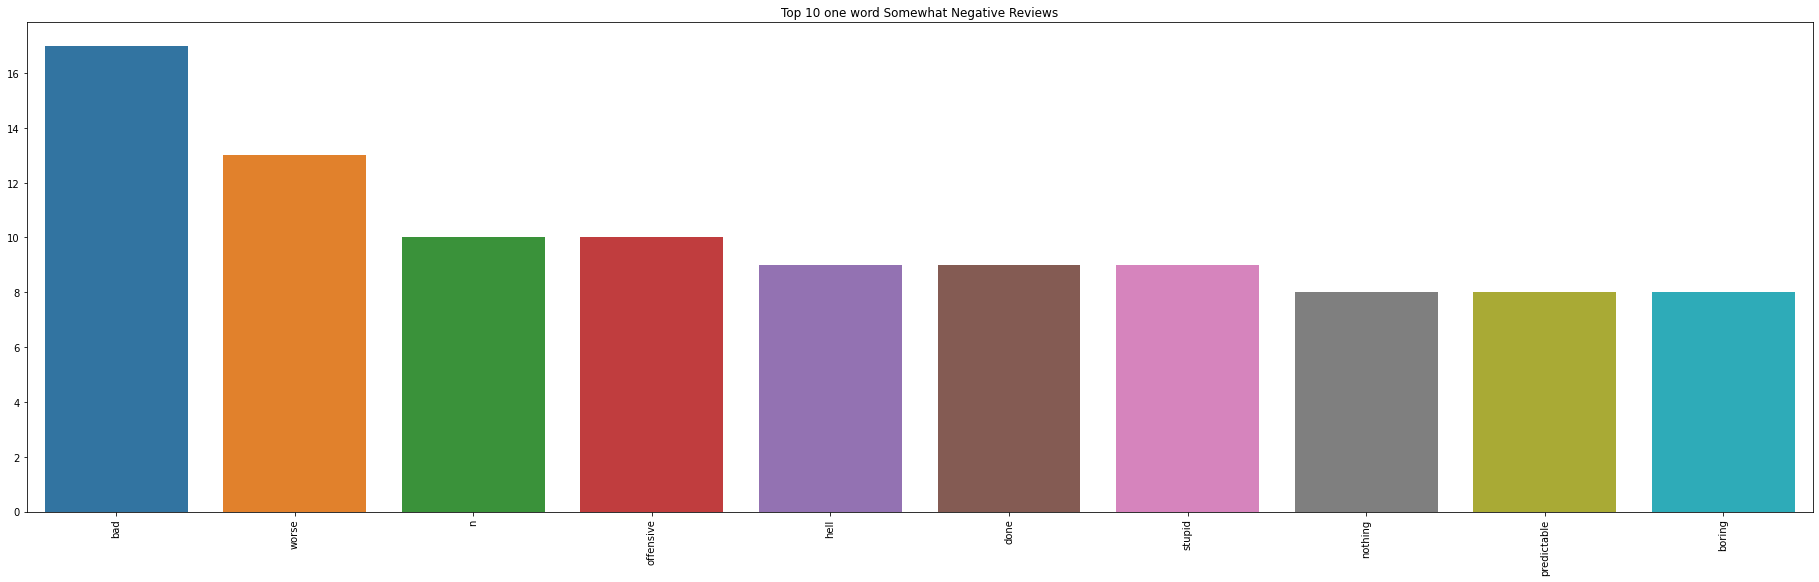

In [60]:
plt.figure(figsize=(32,9))
plt.xticks(rotation=90)
plt.title("Top 10 one word Somewhat Negative Reviews")
sns.barplot(x=[i[0] for i in sorted_somewhat_negative_sentiment_words], y=[i[1] for i in sorted_somewhat_negative_sentiment_words], )

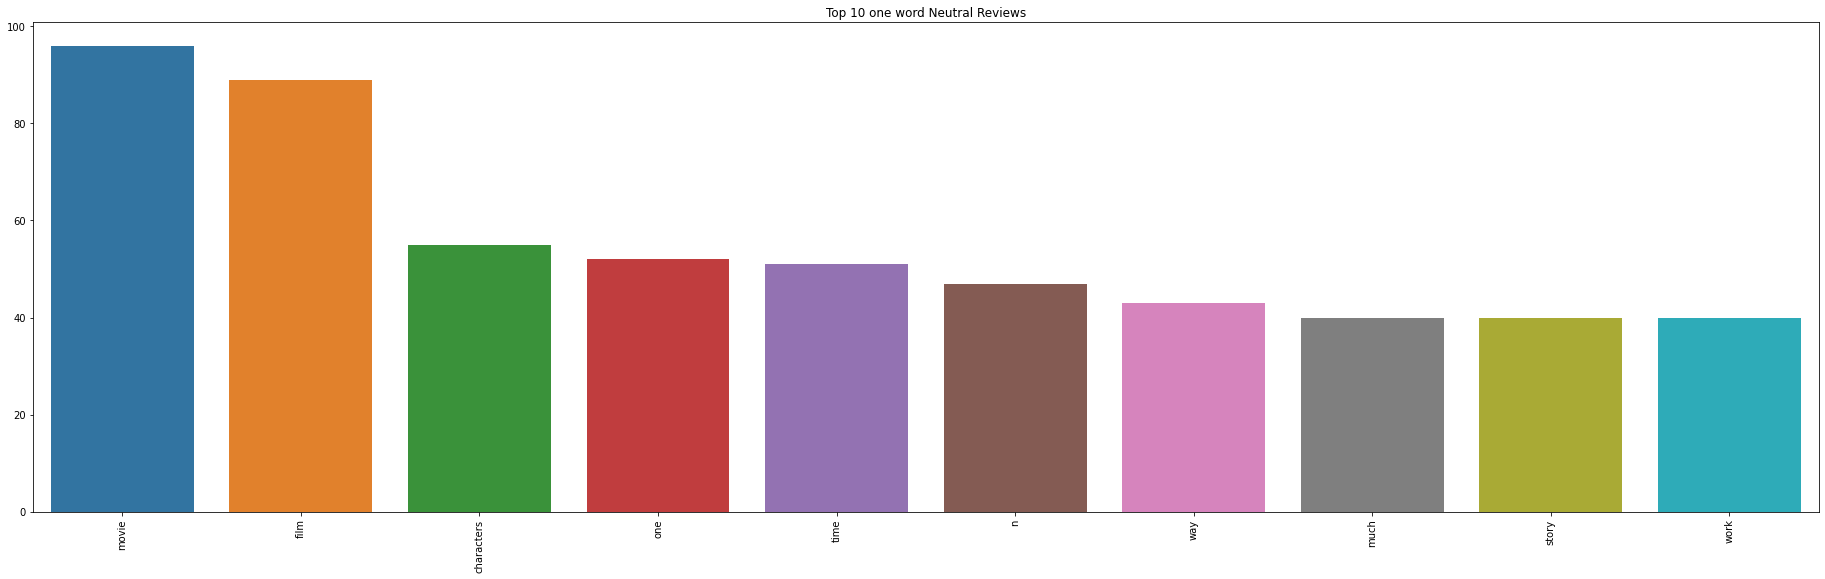

In [61]:
plt.figure(figsize=(32,9))
plt.xticks(rotation=90)
plt.title("Top 10 one word Neutral Reviews")
sns.barplot(x=[i[0] for i in sorted_neutral_sentiment_words], y=[i[1] for i in sorted_neutral_sentiment_words], )

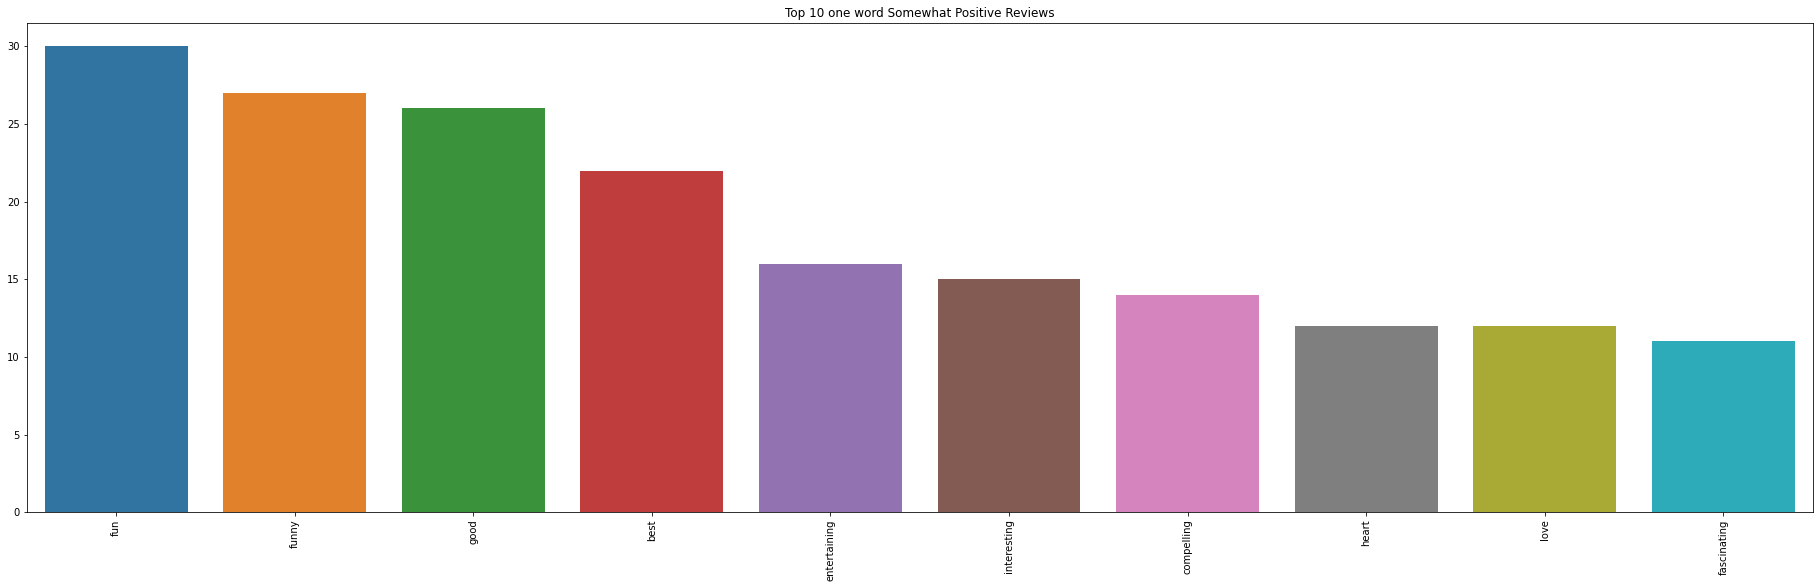

In [62]:
plt.figure(figsize=(32,9))
plt.xticks(rotation=90)
plt.title("Top 10 one word Somewhat Positive Reviews")
sns.barplot(x=[i[0] for i in sorted_somewhat_positive_sentiment_words], y=[i[1] for i in sorted_somewhat_positive_sentiment_words], )

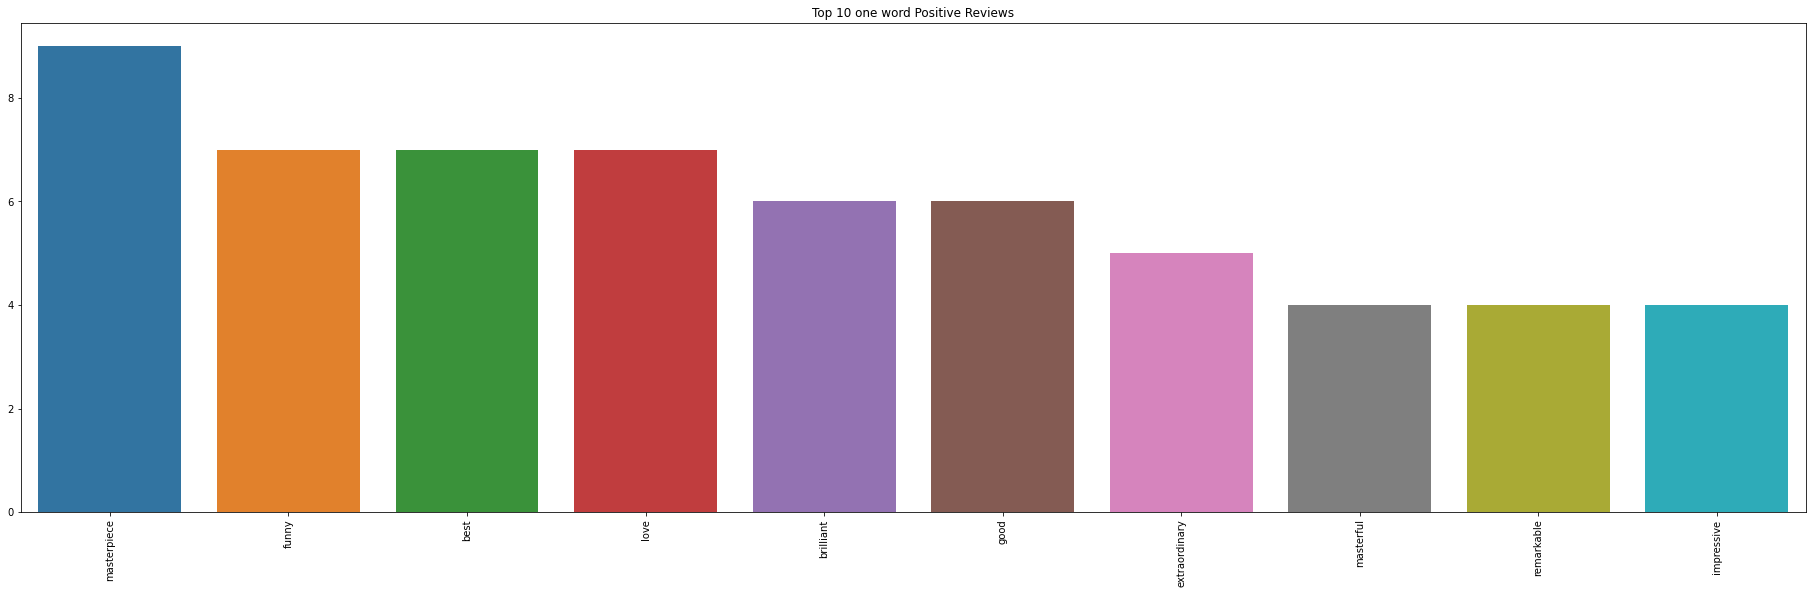

In [63]:
plt.figure(figsize=(32,9))
plt.xticks(rotation=90)
plt.title("Top 10 one word Positive Reviews")
sns.barplot(x=[i[0] for i in sorted_positive_sentiment_words], y=[i[1] for i in sorted_positive_sentiment_words], )